In [6]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [7]:
dFrame = pd.read_csv("your_data.csv", index_col=0)

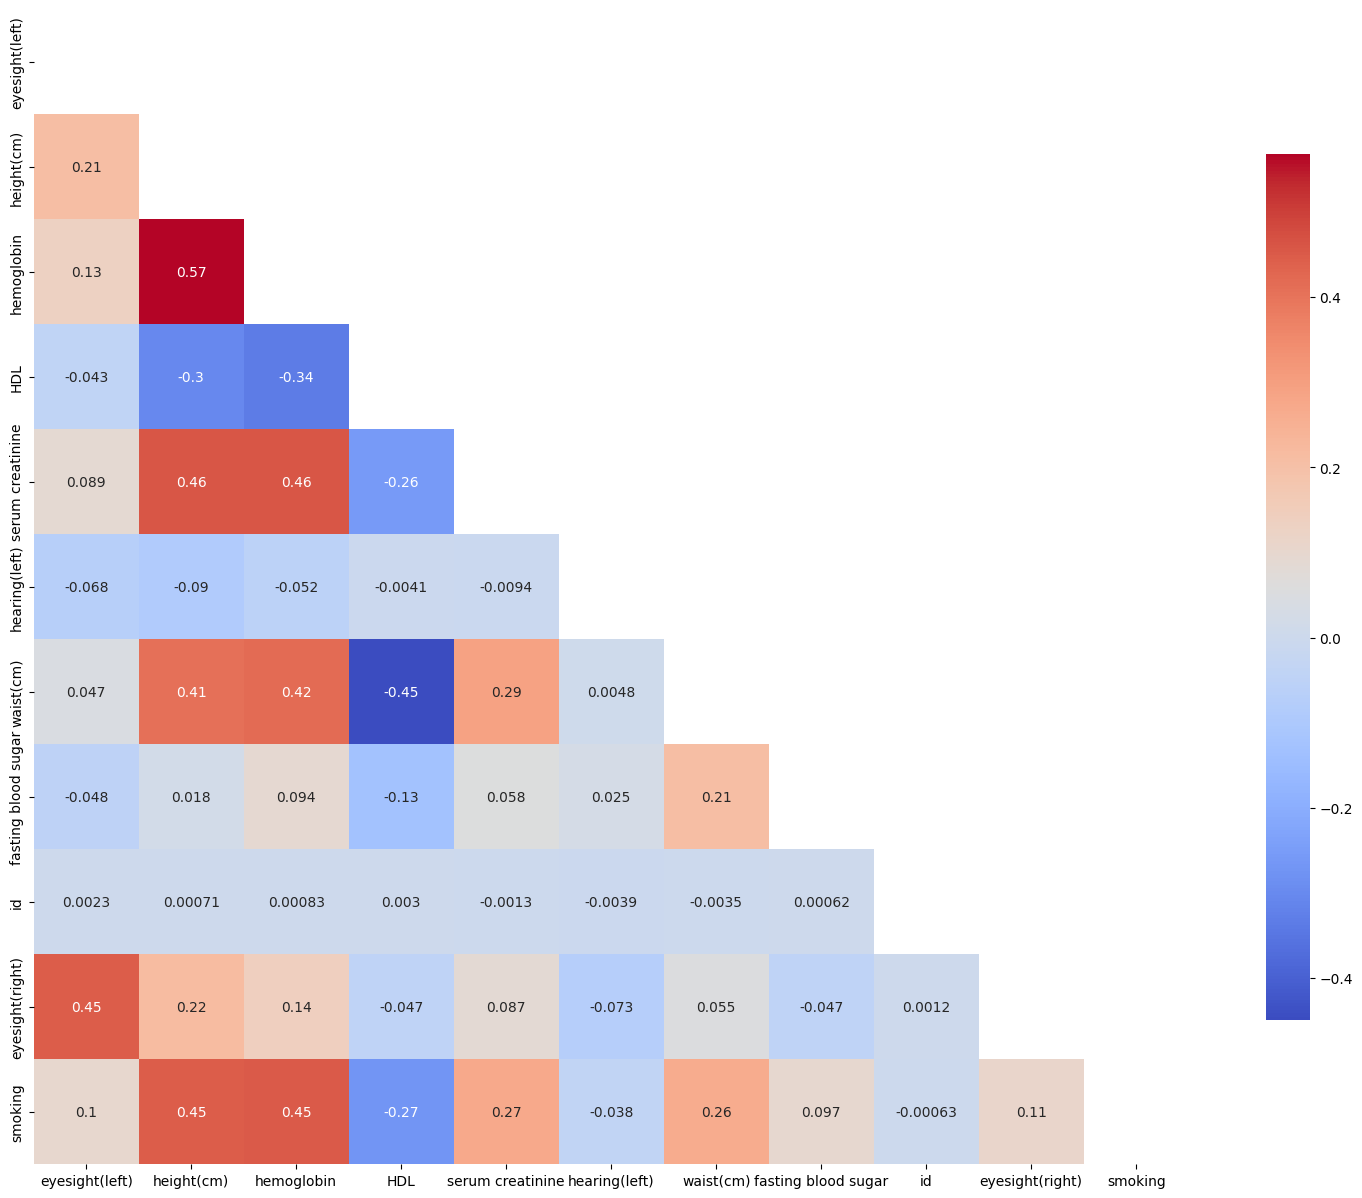

In [8]:
corr = dFrame.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .75})
plt.show()

In [9]:
#dropping unrelevant features
dFrame= dFrame.drop(['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'id', 'fasting blood sugar'], axis=1)

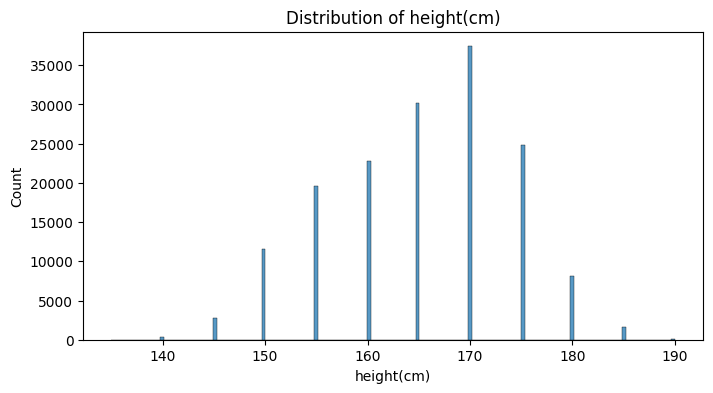

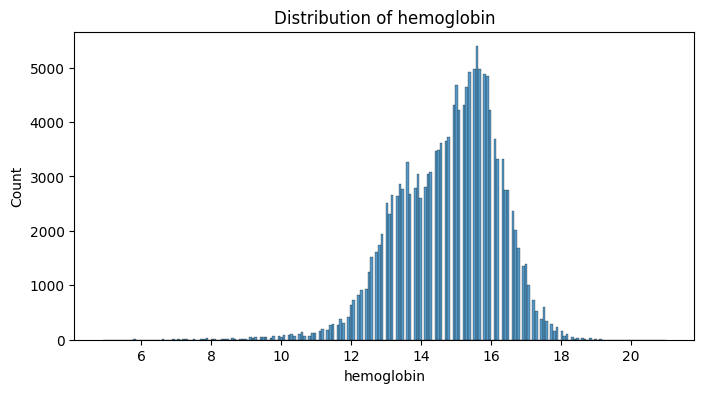

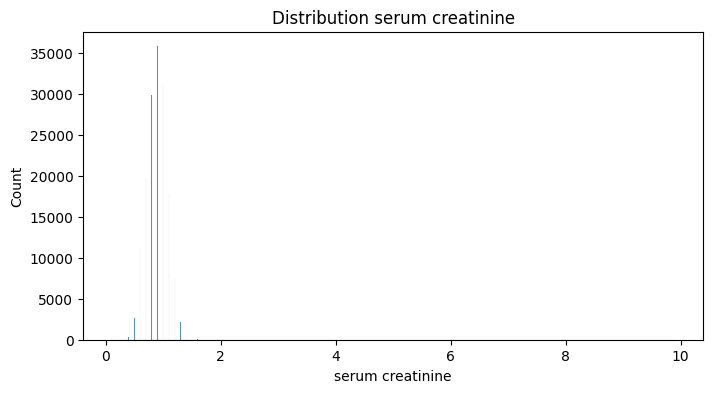

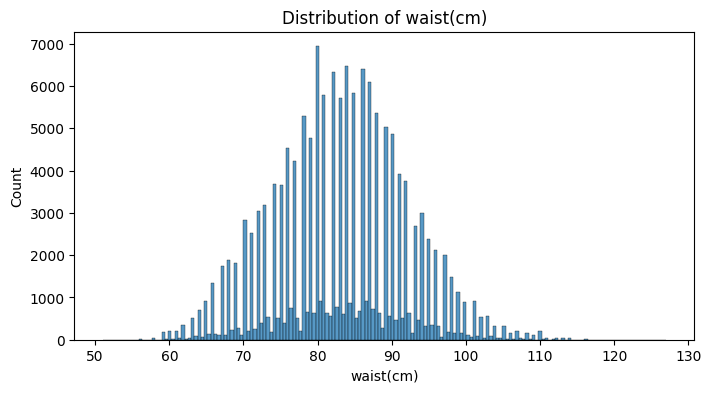

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(dFrame['height(cm)'])
plt.title('Distribution of height(cm)')
plt.xlabel('height(cm)')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(dFrame['hemoglobin'])
plt.title('Distribution of hemoglobin')
plt.xlabel('hemoglobin')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(dFrame['serum creatinine'])
plt.title('Distribution serum creatinine')
plt.xlabel('serum creatinine')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(dFrame['waist(cm)'])
plt.title('Distribution of waist(cm)')  
plt.xlabel('waist(cm)')
plt.show()

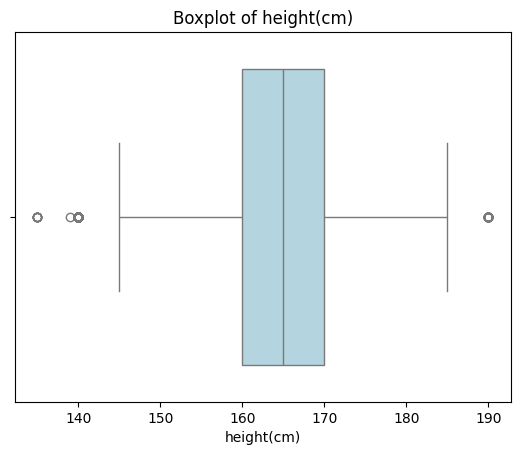

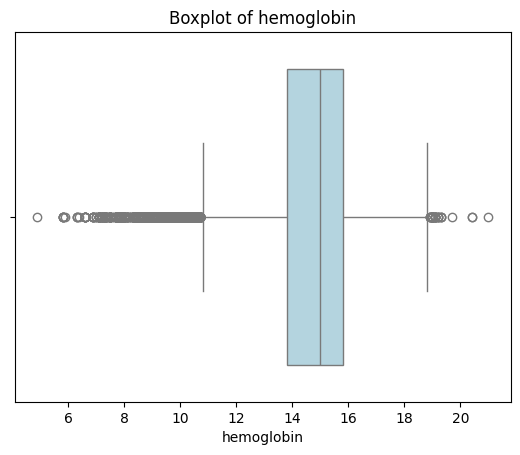

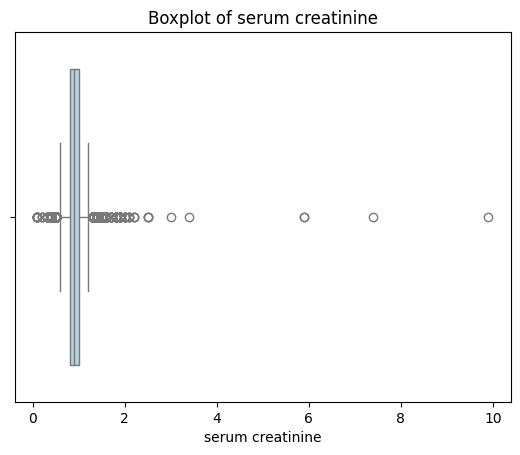

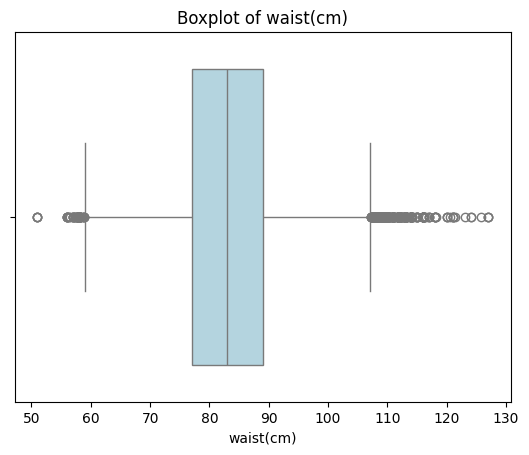

In [19]:
sns.boxplot(x=dFrame['height(cm)'], color='lightblue')
plt.title(f'Boxplot of height(cm)')
plt.show()
sns.boxplot(x=dFrame['hemoglobin'], color='lightblue')
plt.title(f'Boxplot of hemoglobin')
plt.show()
sns.boxplot(x=dFrame['serum creatinine'], color='lightblue')
plt.title(f'Boxplot of serum creatinine')
plt.show()
sns.boxplot(x=dFrame['waist(cm)'], color='lightblue')
plt.title(f'Boxplot of waist(cm)')
plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
minmax_scaler = MinMaxScaler()    # For height
robust_scaler = RobustScaler()    # For hemoglobin

# Normalize each feature differently
dFrame['height_normalized'] = minmax_scaler.fit_transform(dFrame[['height(cm)']])
dFrame['hemoglobin_normalized'] = robust_scaler.fit_transform(dFrame[['hemoglobin']])

In [22]:
dFrame['serum creatinine_normalized'] = robust_scaler.fit_transform(dFrame[['serum creatinine']])
dFrame['waist_normalized'] = robust_scaler.fit_transform(dFrame[['waist(cm)']])

In [ ]:
dFrame = dFrame.drop(['height(cm)', 'hemoglobin', 'serum creatinine', 'waist(cm)'], axis=1)
dFrame['height_hemoglobin'] = (dFrame['height_normalized'] + dFrame['hemoglobin_normalized'] ) / 2